<a href="https://colab.research.google.com/github/KapilDhondi/KapilDhondi/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#@ Assignment 5

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}

In [ ]:
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df = df[['Ground Temperature','Chirps/Second']]
df

,Ground Temperature,Chirps/Second
0,88.6,20.0
1,71.6,16.0
2,93.3,19.8
3,84.3,18.4
4,80.6,17.1
5,75.2,15.5
6,69.7,14.7
7,71.6,15.7
8,69.4,15.4
9,83.3,16.3


In [ ]:
df.describe()
# df.isnull().sum()
# df.dtypes

,Ground Temperature,Chirps/Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


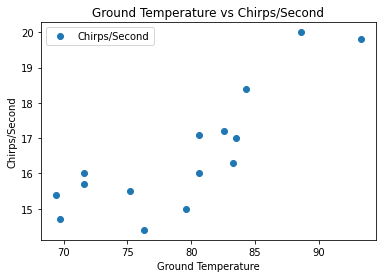

In [ ]:
#ploting data to see if we have linear corelation between data.
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
#finding coorelation between data.
df.corr()

,Ground Temperature,Chirps/Second
Ground Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


there correlation between chirps and ground temperature, 
if the correlation is negative then the best value is in between -0.2 to -1,
if the correlation is positive then the best value is in between 0.2 to 1 

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split # splitting data into train and test.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 6)
#Model for algorithm - chirping/second = (m * ground temperature) + c
from sklearn.linear_model import LinearRegression # imoprting linear regression 
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(f"printing 'c' {reg.intercept_}")
print(f"printing 'm' {reg.coef_}")

printing 'c' -0.18402339816841717
printing 'm' [0.21018396]


In [ ]:
y_pred = reg.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([17.17717144, 17.366337  , 14.4657984 , 14.86514792, 19.42613978])

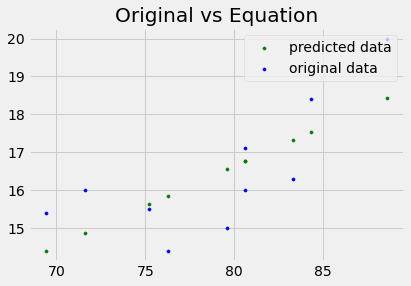

In [ ]:
plt.style.use('fivethirtyeight')                                       # setting the plot
plt.scatter( X_train,reg.predict(X_train),color = "green", s = 10, label = 'predicted data')             #ploting original and equation datas
plt.scatter( X_train,y_train,color = 'blue',s = 10 ,label = 'original data')
plt.legend(loc = 'upper right')
plt.title("Original vs Equation")
plt.show()

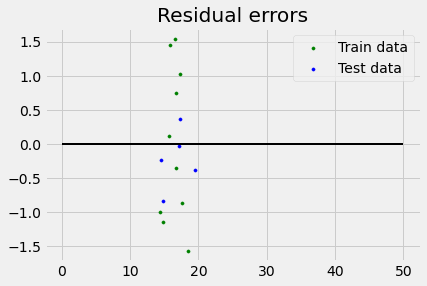

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [ ]:
# testing the ML model using R2 - score
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9305975251938247


In [ ]:
#extapolatinig chirps/second using temperature "95"
reg.predict([[95]])

array([19.78345251])

In [ ]:
# to check for which random state the R2-score is best.
# for i in range(10):
#   X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
#   reg = LinearRegression()
#   reg.fit(X_train, y_train)
#   y_pred = reg.predict(X_test)
#   print('for random state: ', i,'R2- SCORE:', metrics.r2_score(y_test,y_pred))

#@ Assignment6

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
# df.describe()
# df.isnull().sum()
# df.dtypes
df.head(10)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
5,27.660,115.0
6,14.830,98.2
7,1.040,5.5
8,4.190,58.0
9,0.425,6.4


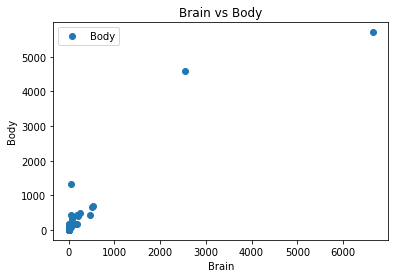

In [ ]:
#ploting data to see if we have linear corelation between data.
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()  # there is linear relationship between "Brain" and "Body".

In [ ]:
#finding coorelation between data.
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
X = df.iloc[:, :-1].values  # Assigning data to variables as features and tragets.
y = df.iloc[:, 1].values    
from sklearn.model_selection import train_test_split # splitting data into train and test.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 1)
#Model for algorithm - chirping/second = (m * ground temperature) + c
from sklearn.linear_model import LinearRegression # imoprting linear regression 
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)  # testing the ML model that we have prepared.
y_pred

array([616.20154059, 115.62748348, 115.57751496, 118.72649262,
       116.85267314, 355.78867986, 115.65535054, 119.67589448,
       149.18807079, 211.64872004, 117.95774616, 115.56502283,
       116.91032912, 300.05456206, 116.08392669, 562.38928893,
       116.90071979, 623.88900512, 115.65246774])

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))   
"""
Here the R2- SCORE is less than "0.8".
Then we may or may not consider as a good model.
Usually the R2- SCORE more than "0.5" is considered as good of the ML model in Linear regression
But we want the model that gives the R2- SCORE more than "0.8"
"""


R2- SCORE: 0.7888057194409372


In [ ]:
# #to check for which random state the R2-score is best.
# for i in range(100):
#   X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
#   reg = LinearRegression()
#   reg.fit(X_train, y_train)
#   y_pred = reg.predict(X_test)
#   if metrics.r2_score(y_test,y_pred) > 0.80:
#       print('for random state: ', i,'R2- SCORE:', metrics.r2_score(y_test,y_pred))

for random state:  23 R2- SCORE: 0.8267978101134336
for random state:  37 R2- SCORE: 0.8148343490725706
for random state:  65 R2- SCORE: 0.8567525389935826


#@ Assignment 7

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head(15)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:

df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


#EDA

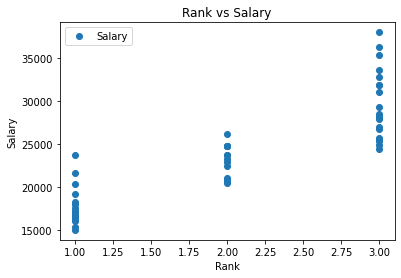

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
# df.groupby('Rank')['Salary'].mean().plot()
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()  # there is a correlation between "Rank" and "Salary".

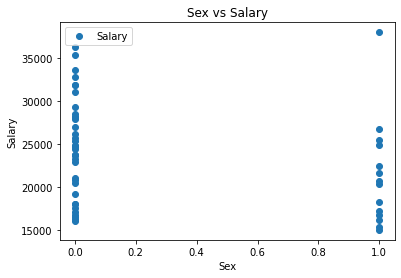

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
# finding the relation btw "Sex" and "Salary".
df.plot(x='Sex',y='Salary',style = 'o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr() 

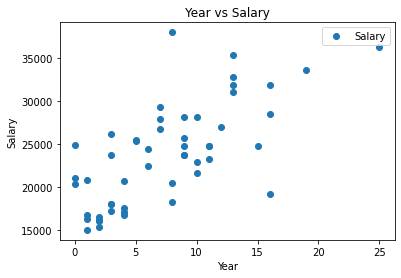

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
# finding relatioin btw "number of years in current role" and "salary".
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

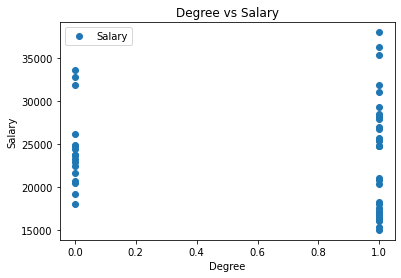

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
# "Degree" and "Salary"
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()  # there is no more than 20% correlation btw those either the positive corr or negative corr.

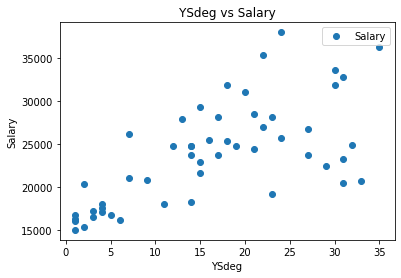

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [5]:
df.plot(x='YSdeg',y='Salary',style = 'o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr() # we can consider it as good feature ,cause it has a greater correlation than '+0.2'.

In [6]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [8]:
X = df[['Sex','Rank','Year','YSdeg']].values# Assigning feature to 'x'.
y = df['Salary'].values # array of targets


In [12]:
# !pip install sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([17203.78254061, 20646.36672551, 30701.75808527, 24939.38088693,
       20183.15689033, 16903.47061119, 21343.55953143, 23012.06615932,
       15952.22581187, 30562.31952408, 15581.1823331 , 27058.66452498,
       19870.8061726 , 32163.48492455, 15904.95360708, 28961.15412362])

In [17]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) 

R2- SCORE: 0.8310504374917687


In [18]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [19]:
"""
checking wether 'sex' is a influencing factor in salary.
By using RFE Feature Selection model.
"""

from sklearn.feature_selection import RFE
selector = RFE(regressor, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['Sex', 'Rank', 'Year',
       'Degree','YSdeg'],selector.support_))  


# Here we can see that 'Sex' is influencing Target


[('Sex', True), ('Rank', True), ('Year', True), ('Degree', True)]

In [20]:
"""
checking wether 'sex' is a influencing factor in salary.
By using Sequential Feature Selection model.
"""
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
list(zip(['Sex', 'Rank', 'Year',
       'Degree','YSdeg'],sfs.get_support()))
# Here we can see that 'Sex' and 'Degree' are not influencing Target value.

[('Sex', False), ('Rank', True), ('Year', True), ('Degree', False)]